In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False

from statannot import add_stat_annotation

import warnings
warnings.filterwarnings('ignore')

In [5]:
ori = pd.read_csv('data/private_expenses_raw.csv', encoding='cp949')

In [6]:
ori#.index#.unique()

,시도별,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,시도별,중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원),중학교 (만원)
1,전 체,26.0,25.5,26.2,27.6,26.7,27.0,27.5,27.5,29.1,31.2,33.8,34.2,39.2,43.8
2,서 울,32.6,30.9,31.8,34.0,34.9,34.9,35.5,37.0,41.7,41.5,46.3,49.2,52.6,60.5
3,부 산,21.8,22.8,23.9,28.1,27.0,26.8,27.6,29.2,33.5,31.6,32.5,34.0,42.1,45.0
4,대 구,29.1,31.2,30.4,28.5,26.7,26.7,26.8,26.3,30.6,33.2,34.2,34.4,42.2,46.9
5,인 천,21.3,22.0,21.9,22.7,21.9,22.6,22.9,23.6,22.8,30.0,33.4,32.9,38.9,39.7
6,광 주,22.8,23.6,25.2,27.3,28.0,27.3,27.2,25.1,27.6,31.0,31.9,33.2,37.4,41.4
7,대 전,21.7,22.1,22.3,26.5,29.0,27.1,27.3,29.0,24.7,29.3,31.7,34.9,35.3,41.1
8,울 산,24.7,24.0,27.2,25.7,26.2,25.4,26.2,25.5,26.1,29.1,30.3,31.0,34.0,39.3
9,세 종,-,-,-,-,-,21.5,22.1,24.1,32.0,33.4,40.2,37.2,40.6,45.8


# Preprocessing

In [7]:
df = ori.T.reset_index().copy()

In [8]:
# 중학교 컬럼 삭제
df = df.drop(columns=0)

# 첫 번째 행 column으로 하고 삭제
df = df.rename(columns=df.iloc[0]).drop(df.index[:6])

# 컬럼 이름 공백 제거
df = df.rename(columns=lambda x: x.strip().replace(" ", ""))

# 시도별 column name 변경 후 type 변경
df = df.rename(columns={'시도별' : 'year'}).set_index('year').astype(float)

# 전체 컬럼 맨 뒤로 옮기기
first_column = df.pop('전체')
df['전체'] = first_column

# index 이름 삭제
df.index.name = None

# Visualization

<Axes: >

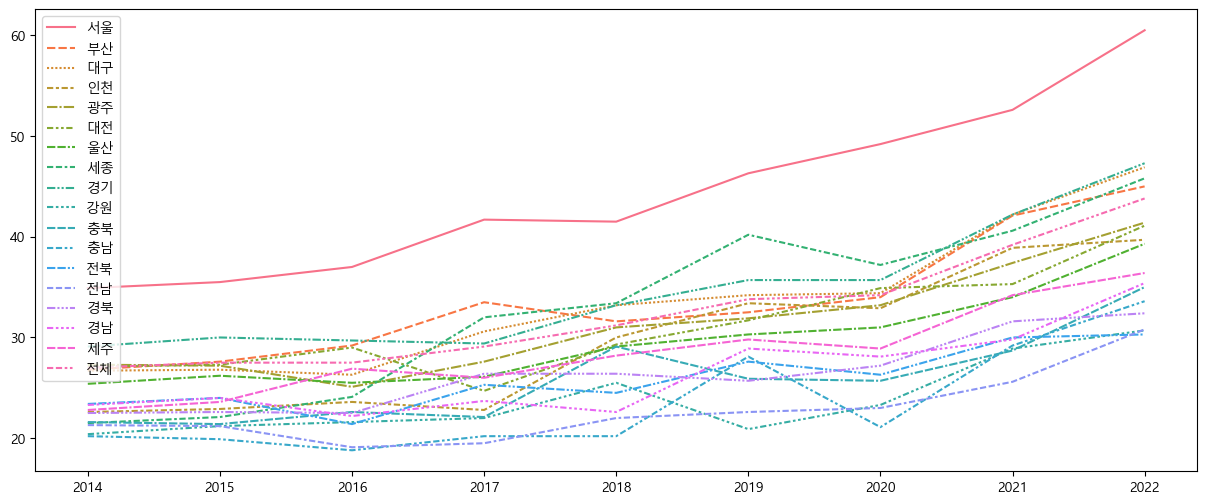

In [9]:
plt.figure(figsize=(15,6))

sns.lineplot(df)

In [10]:
# df.to_csv('private_expenses_middle.csv')